In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import h5py
import os.path

import image_proc
import train_detector

import torch
import torchvision
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from craft.craft import CRAFT

import time
from importlib import reload

In [9]:
reload(train_detector)

<module 'train_detector' from '/home/eee198/Documents/ocr/asstr/train_detector.py'>

In [2]:
gt_path = "/home/eee198/Downloads/SynthText/gt_v7.3.mat"
img_dir = "/home/eee198/Downloads/SynthText/images"

dataset_kwargs = {"cuda": False}
dataloader_kwargs = {"batch_size": 4}

dataloader, train, test = train_detector.init_data(gt_path, img_dir,
        dataset_kwargs=dataset_kwargs, dataloader_kwargs=dataloader_kwargs)

In [20]:
folder_name = "1"
weight_dir = f"/home/eee198/Downloads/weights/detector/{folder_name}"
weight_fname = "/home/eee198/Downloads/weights/detector/synth_pretrained.pth"
num_class = 2

model, criterion, optimizer = train_detector.init_model(weight_dir, weight_fname, num_class, linear=True)

In [4]:
epochs = 1

retval = train_detector.train_loop(dataloader, model, criterion, optimizer,
                                   weight_dir, epochs=epochs)

[1,   100] loss: 0.007355
[1,   200] loss: 0.009158
[1,   300] loss: 0.008309
[1,   400] loss: 0.007562
[1,   500] loss: 0.006886
[1,   600] loss: 0.006739
[1,   700] loss: 0.008736
[1,   800] loss: 0.006633
[1,   900] loss: 0.005286
[1,  1000] loss: 0.006433
[1,  1100] loss: 0.005988
[1,  1200] loss: 0.006254
[1,  1300] loss: 0.006574
[1,  1400] loss: 0.004855
[1,  1500] loss: 0.008076
[1,  1600] loss: 0.013715
[1,  1700] loss: 0.006004
[1,  1800] loss: 0.006155
[1,  1900] loss: 0.006550
[1,  2000] loss: 0.007032
[1,  2100] loss: 0.005791
[1,  2200] loss: 0.007058
[1,  2300] loss: 0.009482
[1,  2400] loss: 0.007291
[1,  2500] loss: 0.008890
[1,  2600] loss: 0.006041
[1,  2700] loss: 0.009979
[1,  2800] loss: 0.006603
[1,  2900] loss: 0.005338
[1,  3000] loss: 0.006347
[1,  3100] loss: 0.007344
[1,  3200] loss: 0.006826
[1,  3300] loss: 0.011898
[1,  3400] loss: 0.012494
[1,  3500] loss: 0.007837
[1,  3600] loss: 0.006139
[1,  3700] loss: 0.006872
[1,  3800] loss: 0.005425
[1,  3900] l

[1, 31000] loss: 0.005867
[1, 31100] loss: 0.009458
[1, 31200] loss: 0.005492
[1, 31300] loss: 0.008029
[1, 31400] loss: 0.004589
[1, 31500] loss: 0.006758
[1, 31600] loss: 0.005102
[1, 31700] loss: 0.006666
[1, 31800] loss: 0.006253
[1, 31900] loss: 0.014879
[1, 32000] loss: 0.004654
[1, 32100] loss: 0.005441
[1, 32200] loss: 0.004530
[1, 32300] loss: 0.004974
[1, 32400] loss: 0.005913
[1, 32500] loss: 0.004331
[1, 32600] loss: 0.005754
[1, 32700] loss: 0.004722
[1, 32800] loss: 0.005690
[1, 32900] loss: 0.009217
[1, 33000] loss: 0.004889
[1, 33100] loss: 0.005091
[1, 33200] loss: 0.006880
[1, 33300] loss: 0.009264
[1, 33400] loss: 0.006305
[1, 33500] loss: 0.006394
[1, 33600] loss: 0.005571
[1, 33700] loss: 0.004229
[1, 33800] loss: 0.007270
[1, 33900] loss: 0.005580
[1, 34000] loss: 0.004187
[1, 34100] loss: 0.007467
[1, 34200] loss: 0.007345
[1, 34300] loss: 0.009317
[1, 34400] loss: 0.007144
[1, 34500] loss: 0.004601
[1, 34600] loss: 0.004732
[1, 34700] loss: 0.004797
[1, 34800] l

[1, 61900] loss: 0.004448
[1, 62000] loss: 0.003868
[1, 62100] loss: 0.007360
[1, 62200] loss: 0.005230
[1, 62300] loss: 0.005174
[1, 62400] loss: 0.005863
[1, 62500] loss: 0.006418
[1, 62600] loss: 0.006045
[1, 62700] loss: 0.005289
[1, 62800] loss: 0.004747
[1, 62900] loss: 0.006823
[1, 63000] loss: 0.007126
[1, 63100] loss: 0.006845
[1, 63200] loss: 0.005824
[1, 63300] loss: 0.005985
[1, 63400] loss: 0.006619
[1, 63500] loss: 0.005692
[1, 63600] loss: 0.010426
[1, 63700] loss: 0.005172
[1, 63800] loss: 0.005791
[1, 63900] loss: 0.005645
[1, 64000] loss: 0.006493
[1, 64100] loss: 0.009296
[1, 64200] loss: 0.007109
[1, 64300] loss: 0.004604
[1, 64400] loss: 0.005364
[1, 64500] loss: 0.006187
[1, 64600] loss: 0.008900
[1, 64700] loss: 0.004816
[1, 64800] loss: 0.007149
[1, 64900] loss: 0.004990
[1, 65000] loss: 0.003589
[1, 65100] loss: 0.008665
[1, 65200] loss: 0.007054
[1, 65300] loss: 0.005101
[1, 65400] loss: 0.006444
[1, 65500] loss: 0.006243
[1, 65600] loss: 0.005291
[1, 65700] l

In [6]:
torch.save(model.state_dict(), f"/home/eee198/Downloads/SynthText/weights/{folder_name}/w_{i}_interrupt.pth")

In [9]:
for img, gt in dataloader:
    print(f"img.shape = {img.shape}")
    print(f"img.shape = {gt.shape}")
    break

img.shape = torch.Size([4, 3, 377, 458])
img.shape = torch.Size([4, 188, 229, 2])


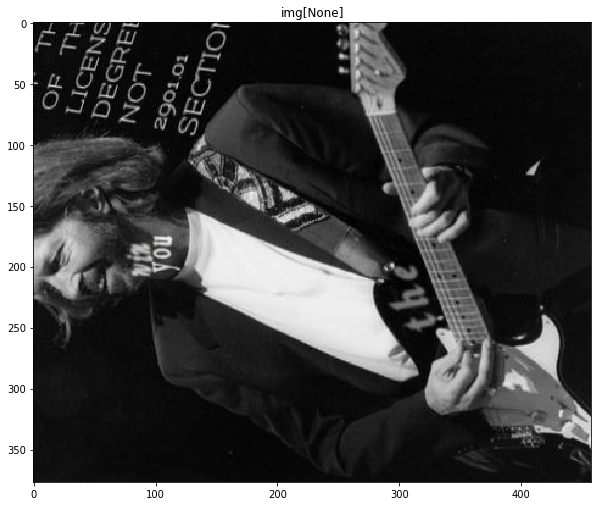

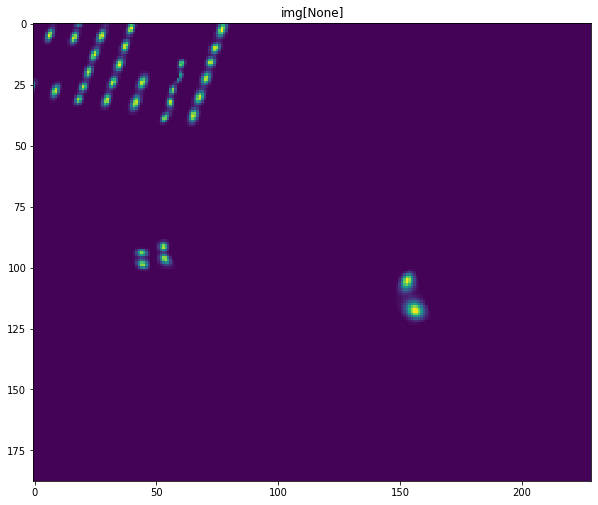

In [10]:
def show_samples(imgs, i=None, feature_type="img", title=None, channel=None):
    imgs = imgs.detach().cpu().numpy()
    if i == None:
        img = imgs
    else:
        img = imgs[i]

    if feature_type == "img":
        img = img.transpose(1,2,0)
    elif feature_type == "gt":
        pass

    if channel != None:
        img = img[:,:,channel]
        
    if title is None:
        title = f"img[{i}]"

    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.imshow(img, interpolation='nearest')

    plt.show()

i = 0
show_samples(img[i])
show_samples(gt[i], feature_type="gt", channel=1)

In [21]:
output, _ = model(img.cuda())
print(f"output.shape = {output.shape}")

output.shape = torch.Size([4, 188, 229, 2])


In [17]:
torch.max(output)

tensor(0.9514, device='cuda:0', grad_fn=<MaxBackward1>)

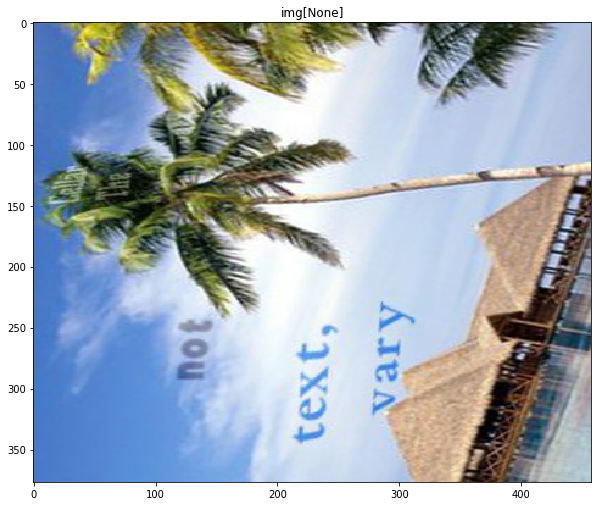

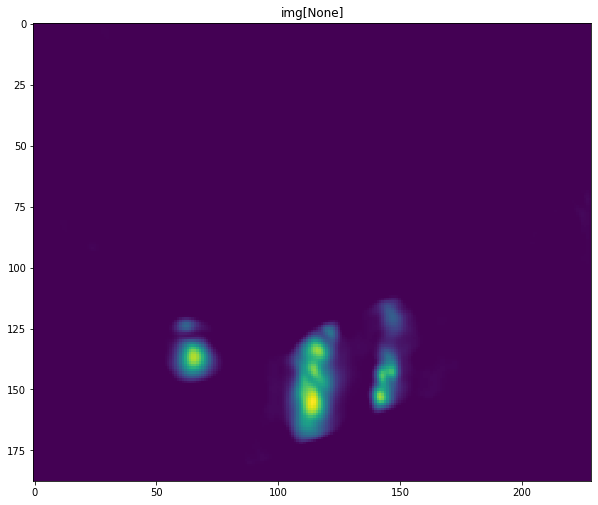

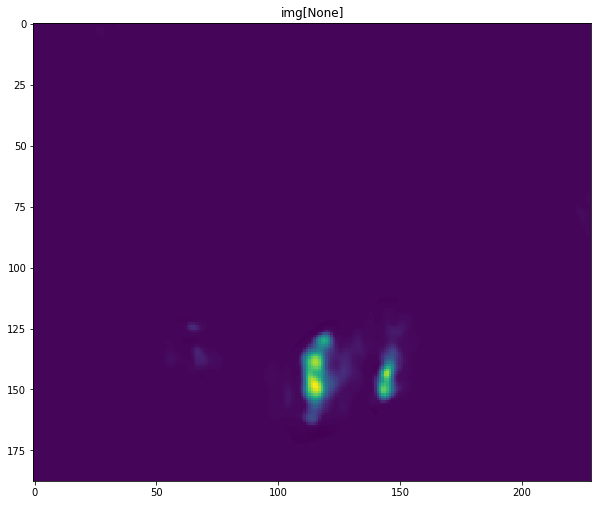

In [18]:
i = 2
show_samples(img[i])
show_samples(output[i], feature_type="gt", channel=0)
show_samples(output[i], feature_type="gt", channel=1)

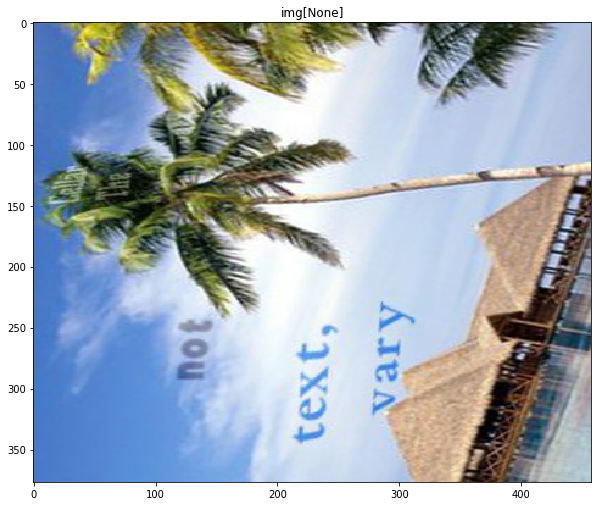

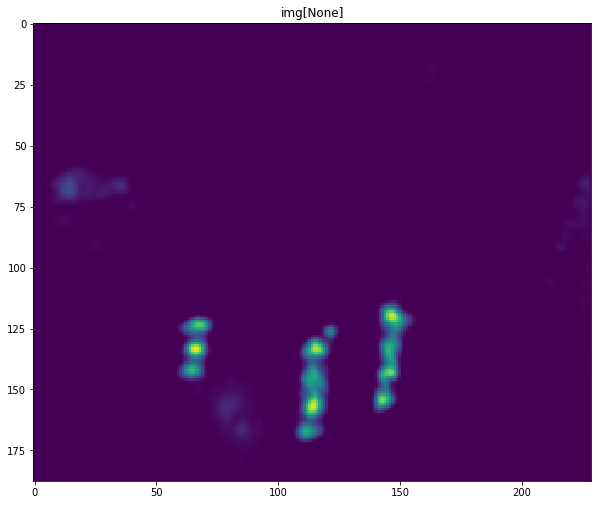

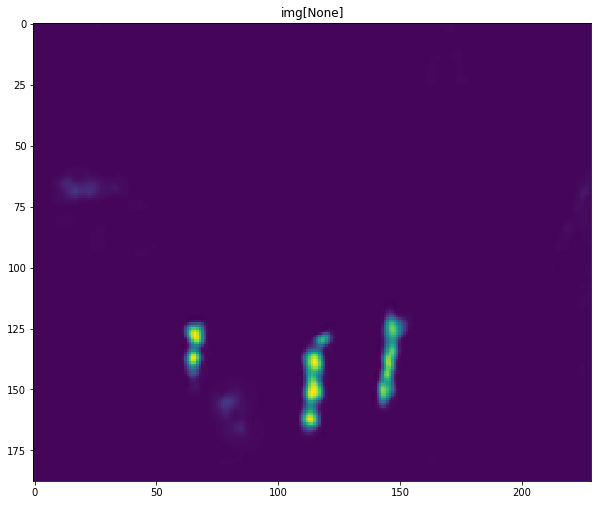

In [22]:
i = 2
show_samples(img[i])
show_samples(output[i], feature_type="gt", channel=0)
show_samples(output[i], feature_type="gt", channel=1)